# <B>MOD 4 PROJECT

<b>main factors in life satisfaction:</b>
   <br>health status
   <br>mental health
   <br>income
   <br>employment status

# <b>DATA CLEANING

<B>IMPORTING DATA:

In [607]:
#importing necessary packages
import numpy as np
from scipy import stats 
import math
import statsmodels.api as sm 
import pylab as py
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

<B>LOOKING THROUGH THE DATASET:

In [608]:
#importing pandas and the csv files
import pandas as pd
df = pd.read_csv('analytic_data2019.csv')
df.head()

C:\Users\Isabel .LAPTOP-RN1IGMF0\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [609]:
#checking shape
df.shape

(3195, 534)

In [610]:
#display list of column values
list(df.columns.values)

['State FIPS Code',
 'County FIPS Code',
 '5-digit FIPS Code',
 'State Abbreviation',
 'Name',
 'Release Year',
 'County Ranked (Yes=1/No=0)',
 'Premature death raw value',
 'Premature death numerator',
 'Premature death denominator',
 'Premature death CI low',
 'Premature death CI high',
 'Premature death (Black)',
 'Premature death (Hispanic)',
 'Premature death (White)',
 'Poor or fair health raw value',
 'Poor or fair health numerator',
 'Poor or fair health denominator',
 'Poor or fair health CI low',
 'Poor or fair health CI high',
 'Poor physical health days raw value',
 'Poor physical health days numerator',
 'Poor physical health days denominator',
 'Poor physical health days CI low',
 'Poor physical health days CI high',
 'Poor mental health days raw value',
 'Poor mental health days numerator',
 'Poor mental health days denominator',
 'Poor mental health days CI low',
 'Poor mental health days CI high',
 'Low birthweight raw value',
 'Low birthweight numerator',
 'Low birthw

In [611]:
#checking for nan values
df.isna().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [612]:
#checking for null values
df.isnull().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [613]:
#renaming columns by placing an underscore between words to make it more usable
columns_name = df.columns
new_column_names = []
for column_name in columns_name:
    new_column_names.append(column_name.replace(" ", "_"))
print(new_column_names[:10])
df.columns = new_column_names

['State_FIPS_Code', 'County_FIPS_Code', '5-digit_FIPS_Code', 'State_Abbreviation', 'Name', 'Release_Year', 'County_Ranked_(Yes=1/No=0)', 'Premature_death_raw_value', 'Premature_death_numerator', 'Premature_death_denominator']


In [614]:
df = df.iloc[2:]

In [615]:
df = df.loc[((df['County_FIPS_Code']!='000') & (df['County_FIPS_Code']!=0))]

In [616]:
df.head()

,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_numerator,Premature_death_denominator,Premature_death_CI_low,Premature_death_CI_high,Premature_death_(Black),Premature_death_(Hispanic),Premature_death_(White),Poor_or_fair_health_raw_value,Poor_or_fair_health_numerator,Poor_or_fair_health_denominator,Poor_or_fair_health_CI_low,Poor_or_fair_health_CI_high,Poor_physical_health_days_raw_value,Poor_physical_health_days_numerator,Poor_physical_health_days_denominator,Poor_physical_health_days_CI_low,Poor_physical_health_days_CI_high,Poor_mental_health_days_raw_value,Poor_mental_health_days_numerator,Poor_mental_health_days_denominator,Poor_mental_health_days_CI_low,Poor_mental_health_days_CI_high,Low_birthweight_raw_value,Low_birthweight_numerator,Low_birthweight_denominator,Low_birthweight_CI_low,Low_birthweight_CI_high,Low_birthweight_(Black),Low_birthweight_(Hispanic),Low_birthweight_(White),Adult_smoking_raw_value,Adult_smoking_numerator,Adult_smoking_denominator,Adult_smoking_CI_low,Adult_smoking_CI_high,Adult_obesity_raw_value,Adult_obesity_numerator,Adult_obesity_denominator,Adult_obesity_CI_low,Adult_obesity_CI_high,Food_environment_index_raw_value,Food_environment_index_numerator,Food_environment_index_denominator,Food_environment_index_CI_low,Food_environment_index_CI_high,Physical_inactivity_raw_value,Physical_inactivity_numerator,Physical_inactivity_denominator,Physical_inactivity_CI_low,Physical_inactivity_CI_high,Access_to_exercise_opportunities_raw_value,Access_to_exercise_opportunities_numerator,Access_to_exercise_opportunities_denominator,Access_to_exercise_opportunities_CI_low,Access_to_exercise_opportunities_CI_high,Excessive_drinking_raw_value,Excessive_drinking_numerator,Excessive_drinking_denominator,Excessive_drinking_CI_low,Excessive_drinking_CI_high,Alcohol-impaired_driving_deaths_raw_value,Alcohol-impaired_driving_deaths_numerator,Alcohol-impaired_driving_deaths_denominator,Alcohol-impaired_driving_deaths_CI_low,Alcohol-impaired_driving_deaths_CI_high,Sexually_transmitted_infections_raw_value,Sexually_transmitted_infections_numerator,Sexually_transmitted_infections_denominator,Sexually_transmitted_infections_CI_low,Sexually_transmitted_infections_CI_high,Teen_births_raw_value,Teen_births_numerator,Teen_births_denominator,Teen_births_CI_low,Teen_births_CI_high,Teen_births_(Black),Teen_births_(Hispanic),Teen_births_(White),Uninsured_raw_value,Uninsured_numerator,Uninsured_denominator,Uninsured_CI_low,Uninsured_CI_high,Primary_care_physicians_raw_value,Primary_care_physicians_numerator,Primary_care_physicians_denominator,Primary_care_physicians_CI_low,Primary_care_physicians_CI_high,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Dentists_numerator,Dentists_denominator,Dentists_CI_low,Dentists_CI_high,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Mental_health_providers_numerator,Mental_health_providers_denominator,Mental_health_providers_CI_low,Mental_health_providers_CI_high,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Preventable_hospital_stays_numerator,Preventable_hospital_stays_denominator,Preventable_hospital_stays_CI_low,Preventable_hospital_stays_CI_high,Preventable_hospital_stays_(Black),Preventable_hospital_stays_(Hispanic),Preventable_hospital_stays_(White),Mammography_screening_raw_value,Mammography_screening_numerator,Mammography_screening_denominator,Mammography_screening_CI_low,Mammography_screening_CI_high,Mammography_screening_(Black),Mammography_screening_(Hispanic),Mammography_screening_(White),Flu_vaccinations_raw_value,Flu_vaccinations_numerator,Flu_vaccinations_denominator,Flu_vaccinations_CI_low,Flu_vaccinations_CI_high,Flu_vaccinations_(Black),Flu_vaccinations_(Hispanic),Flu_vaccinations_(White),High_school_graduation_raw_value,High_school_graduation_numerator,High_school_graduation_denominator,High_

In [617]:
xls = pd.ExcelFile("2019 County Health Rankings Data - v2.xls")
health_rankings = xls.parse(index_col=None, na_values=['NA'])
df.to_csv('file.csv')
health_rankings.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,A collaboration between the Robert Wood Johnso...,NaN,NaN
1,NaN,NaN,NaN
2,This Excel file contains the rankings and data...,NaN,NaN
3,1) Outcomes and Factors Rankings--Ranks are al...,NaN,NaN
4,2) Outcomes and Factors SubRankings--Ranks are...,NaN,NaN


In [618]:
xls = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')
sheet0 = xls.parse(0,skiprows=1) 
sheet1 = xls.parse(1,skiprows=1) 
sheet2 = xls.parse(2,skiprows=1) 
sheet3 = xls.parse(3,skiprows=1) 
sheet4 = xls.parse(4,skiprows=1) 
sheet5 = xls.parse(5,skiprows=1) 
sheet6 = xls.parse(6,skiprows=1)

In [619]:
sheet4

,Focus Area,Measure,Description,Weight,Source,Year(s),Top performers,US Overall
0,Length of life (50%),Premature death,Years of potential life lost before age 75 per...,0.5,National Center for Health Statistics – Mortal...,2015-2017,5400,6900
1,Quality of life (50%),Poor or fair health,% of adults reporting fair or poor health,0.1,Behavioral Risk Factor Surveillance System,2016,0.12,0.16
2,NaN,Poor physical health days,Average # of physically unhealthy days reporte...,0.1,Behavioral Risk Factor Surveillance System,2016,3,3.7
3,NaN,Poor mental health days,Average # of mentally unhealthy days reported ...,0.1,Behavioral Risk Factor Surveillance System,2016,3.1,3.8
4,NaN,Low birthweight,% of live births with low birthweight (< 2500 ...,0.2,National Center for Health Statistics – Natali...,2011-2017,0.06,0.08
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Health Behaviors (30%),NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Focus Area,Measure,NaN,Weight,Source,Year(s),Top performers,US Overall
8,Tobacco use (10%),Adult smoking,% of adults who are current smokers,0.1,Behavioral Risk Factor Surveillance System,2016,0.14,0.17
9,Diet and exercise (10%),Adult obesity,% of adults that report a BMI ≥ 30,0.05,CDC Diabetes Interactive Atlas,2015,0.26,0.29


In [620]:
sheet3.set_index('FIPS', inplace=True)
sheet5.set_index('FIPS', inplace=True)

In [621]:
#combined = pd.concat([df, sheet5, sheet3], axis=1, sort=False, join='inner')

combined = pd.concat([df], axis=1, sort=False, join='inner')
combined.shape

(3142, 534)

In [622]:
df = combined.copy()

In [623]:
clean_columns = [x for x in df.columns if
                 ("numerator" not in x) and
                 ("denominator" not in x) and
                 ("CI_low" not in x) and
                 ("CI_high" not in x)]

In [624]:
df = combined[clean_columns]
df.head()

,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_(Black),Premature_death_(Hispanic),Premature_death_(White),Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Low_birthweight_(Black),Low_birthweight_(Hispanic),Low_birthweight_(White),Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Teen_births_(Black),Teen_births_(Hispanic),Teen_births_(White),Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Preventable_hospital_stays_(Black),Preventable_hospital_stays_(Hispanic),Preventable_hospital_stays_(White),Mammography_screening_raw_value,Mammography_screening_(Black),Mammography_screening_(Hispanic),Mammography_screening_(White),Flu_vaccinations_raw_value,Flu_vaccinations_(Black),Flu_vaccinations_(Hispanic),Flu_vaccinations_(White),High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Children_in_poverty_(Black),Children_in_poverty_(Hispanic),Children_in_poverty_(White),Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Air_pollution_-_particulate_matter_raw_value,Drinking_water_violations_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Driving_alone_to_work_(Black),Driving_alone_to_work_(Hispanic),Driving_alone_to_work_(White),Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Life_expectancy_(Black),Life_expectancy_(Hispanic),Life_expectancy_(White),Premature_age-adjusted_mortality_raw_value,Premature_age-adjusted_mortality_(Black),Premature_age-adjusted_mortality_(Hispanic),Premature_age-adjusted_mortality_(White),Child_mortality_raw_value,Child_mortality_(Black),Child_mortality_(Hispanic),Child_mortality_(White),Infant_mortality_raw_value,Infant_mortality_(Black),Infant_mortality_(Hispanic),Infant_mortality_(White),Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,HIV_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Disconnected_youth_raw_value,Median_household_income_raw_value,Median_household_income_(Black),Median_household_income_(Hispanic),Median_household_income_(White),Children_eligible_for_free_or_reduced_price_lunch_raw_value,Residential_segregation_-_Black/White_raw_value,Residential_segregation_-_non-white/white_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_Non-Hispanic_African_American_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_Hispanic_raw_value,%_Non-Hispanic_white_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value,Communicable_disease_raw_value,Self-inflicted_injury_hospitalizations_raw_value,Cancer_incidence_raw

In [625]:
#checking the data types for each column
for col in df.columns:
    print(df[col].dtypes, col)

object State_FIPS_Code
object County_FIPS_Code
object 5-digit_FIPS_Code
object State_Abbreviation
object Name
object Release_Year
object County_Ranked_(Yes=1/No=0)
object Premature_death_raw_value
object Premature_death_(Black)
object Premature_death_(Hispanic)
object Premature_death_(White)
object Poor_or_fair_health_raw_value
object Poor_physical_health_days_raw_value
object Poor_mental_health_days_raw_value
object Low_birthweight_raw_value
object Low_birthweight_(Black)
object Low_birthweight_(Hispanic)
object Low_birthweight_(White)
object Adult_smoking_raw_value
object Adult_obesity_raw_value
object Food_environment_index_raw_value
object Physical_inactivity_raw_value
object Access_to_exercise_opportunities_raw_value
object Excessive_drinking_raw_value
object Alcohol-impaired_driving_deaths_raw_value
object Sexually_transmitted_infections_raw_value
object Teen_births_raw_value
object Teen_births_(Black)
object Teen_births_(Hispanic)
object Teen_births_(White)
object Uninsured_raw_

In [626]:
df1=df[['State_FIPS_Code','County_FIPS_Code','5-digit_FIPS_Code','State_Abbreviation','Name','Release_Year','County_Ranked_(Yes=1/No=0)']]

In [627]:
df2 = df.iloc[:,7:].astype(float)

In [628]:
dfClean = df1.merge(df2, left_index=True,right_index=True)
dfClean.head()

,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_(Black),Premature_death_(Hispanic),Premature_death_(White),Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Low_birthweight_(Black),Low_birthweight_(Hispanic),Low_birthweight_(White),Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Teen_births_(Black),Teen_births_(Hispanic),Teen_births_(White),Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Preventable_hospital_stays_(Black),Preventable_hospital_stays_(Hispanic),Preventable_hospital_stays_(White),Mammography_screening_raw_value,Mammography_screening_(Black),Mammography_screening_(Hispanic),Mammography_screening_(White),Flu_vaccinations_raw_value,Flu_vaccinations_(Black),Flu_vaccinations_(Hispanic),Flu_vaccinations_(White),High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Children_in_poverty_(Black),Children_in_poverty_(Hispanic),Children_in_poverty_(White),Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Air_pollution_-_particulate_matter_raw_value,Drinking_water_violations_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Driving_alone_to_work_(Black),Driving_alone_to_work_(Hispanic),Driving_alone_to_work_(White),Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Life_expectancy_(Black),Life_expectancy_(Hispanic),Life_expectancy_(White),Premature_age-adjusted_mortality_raw_value,Premature_age-adjusted_mortality_(Black),Premature_age-adjusted_mortality_(Hispanic),Premature_age-adjusted_mortality_(White),Child_mortality_raw_value,Child_mortality_(Black),Child_mortality_(Hispanic),Child_mortality_(White),Infant_mortality_raw_value,Infant_mortality_(Black),Infant_mortality_(Hispanic),Infant_mortality_(White),Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,HIV_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Disconnected_youth_raw_value,Median_household_income_raw_value,Median_household_income_(Black),Median_household_income_(Hispanic),Median_household_income_(White),Children_eligible_for_free_or_reduced_price_lunch_raw_value,Residential_segregation_-_Black/White_raw_value,Residential_segregation_-_non-white/white_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_Non-Hispanic_African_American_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_Hispanic_raw_value,%_Non-Hispanic_white_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value,Communicable_disease_raw_value,Self-inflicted_injury_hospitalizations_raw_value,Cancer_incidence_raw

In [629]:
#checking the data types for each column
for col in df.columns:
    print(dfClean[col].dtypes, col)

object State_FIPS_Code
object County_FIPS_Code
object 5-digit_FIPS_Code
object State_Abbreviation
object Name
object Release_Year
object County_Ranked_(Yes=1/No=0)
float64 Premature_death_raw_value
float64 Premature_death_(Black)
float64 Premature_death_(Hispanic)
float64 Premature_death_(White)
float64 Poor_or_fair_health_raw_value
float64 Poor_physical_health_days_raw_value
float64 Poor_mental_health_days_raw_value
float64 Low_birthweight_raw_value
float64 Low_birthweight_(Black)
float64 Low_birthweight_(Hispanic)
float64 Low_birthweight_(White)
float64 Adult_smoking_raw_value
float64 Adult_obesity_raw_value
float64 Food_environment_index_raw_value
float64 Physical_inactivity_raw_value
float64 Access_to_exercise_opportunities_raw_value
float64 Excessive_drinking_raw_value
float64 Alcohol-impaired_driving_deaths_raw_value
float64 Sexually_transmitted_infections_raw_value
float64 Teen_births_raw_value
float64 Teen_births_(Black)
float64 Teen_births_(Hispanic)
float64 Teen_births_(White

# <b>EXPLORATORY DATA ANALYSIS

# <B>Mental health:

In [630]:
dfMH=df[['State_Abbreviation','Name','Poor_mental_health_days_raw_value']]
dfMH.head()

,State_Abbreviation,Name,Poor_mental_health_days_raw_value
3,AL,Autauga County,4.3067392835
4,AL,Baldwin County,4.2496487805
5,AL,Barbour County,4.634994147
6,AL,Bibb County,4.3157100192
7,AL,Blount County,4.7015992588


In [631]:
for col in dfMH.columns:
    print(dfMH[col].dtypes, col)

object State_Abbreviation
object Name
object Poor_mental_health_days_raw_value


In [632]:
#changing the type of mental health days raw value from an object to a float
dfMH['Poor_mental_health_days_raw_value']=dfMH['Poor_mental_health_days_raw_value'].astype('float')

C:\Users\Isabel .LAPTOP-RN1IGMF0\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [633]:
dfMH.groupby(['State_Abbreviation'])['Poor_mental_health_days_raw_value'].mean()

State_Abbreviation
AK    3.636779
AL    4.706399
AR    4.920800
AZ    4.259460
CA    3.803822
CO    3.535565
CT    3.539592
DC    3.542423
DE    3.690745
FL    4.119860
GA    4.005318
HI    3.212321
IA    3.238646
ID    3.902228
IL    3.656727
IN    4.055998
KS    3.285827
KY    4.566015
LA    4.375729
MA    4.095592
MD    3.685777
ME    4.022771
MI    4.191772
MN    3.041505
MO    4.478655
MS    4.260233
MT    3.445554
NC    4.210638
ND    2.815294
NE    3.083371
NH    3.930848
NJ    3.641218
NM    4.117793
NV    4.277706
NY    3.901546
OH    4.031130
OK    4.626338
OR    4.300585
PA    4.019852
RI    3.909078
SC    4.541641
SD    3.050082
TN    4.775436
TX    3.643422
UT    3.642977
VA    3.688398
VT    4.018105
WA    3.955534
WI    3.548089
WV    5.120039
WY    3.467113
Name: Poor_mental_health_days_raw_value, dtype: float64

Text(0.5, 0, 'State')

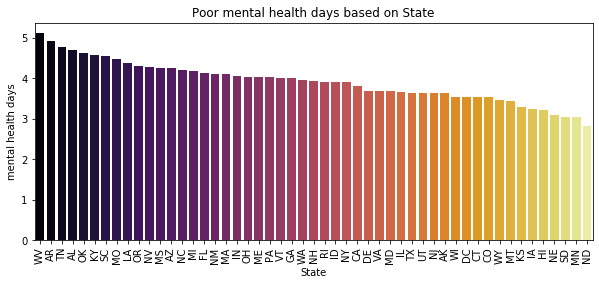

In [634]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfMH.groupby(['State_Abbreviation'])['Poor_mental_health_days_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Poor_mental_health_days_raw_value'], x = cnt.index, palette= 'inferno')
ax.set_title('Poor mental health days based on State')
ax.set_ylabel('mental health days')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')


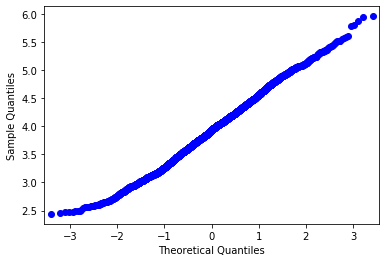

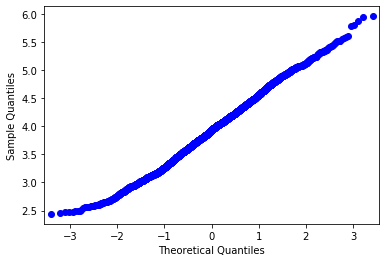

In [675]:
sm.qqplot(dfMH['Poor_mental_health_days_raw_value'])

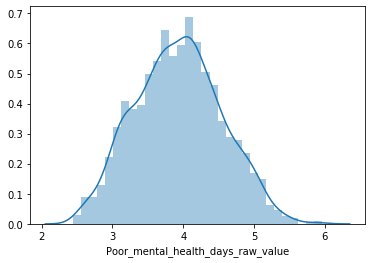

In [667]:
sns.distplot(dfMH['% Unemployed'])

# <b>Physical health:

In [681]:
dfFH=df[['State_Abbreviation','Name','Poor_physical_health_days_raw_value']]
dfFH.head()

,State_Abbreviation,Name,Poor_physical_health_days_raw_value
3,AL,Autauga County,4.2005779826
4,AL,Baldwin County,4.0987477691
5,AL,Barbour County,5.0674383044
6,AL,Bibb County,4.3633772783
7,AL,Blount County,4.5127526482


In [682]:
#changing the type of physical health days raw value from an object to a float
dfFH['Poor_physical_health_days_raw_value']=dfFH['Poor_physical_health_days_raw_value'].astype('float')

C:\Users\Isabel .LAPTOP-RN1IGMF0\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'State')

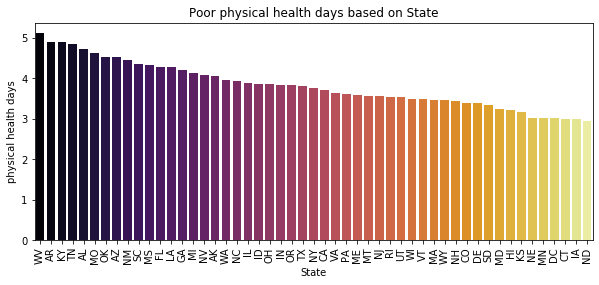

In [683]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfFH.groupby(['State_Abbreviation'])['Poor_physical_health_days_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Poor_physical_health_days_raw_value'], x = cnt.index, palette= 'inferno')
ax.set_title('Poor physical health days based on State')
ax.set_ylabel('physical health days')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')

# <b>Income:

In [635]:
df.head()

,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_(Black),Premature_death_(Hispanic),Premature_death_(White),Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Low_birthweight_(Black),Low_birthweight_(Hispanic),Low_birthweight_(White),Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Teen_births_(Black),Teen_births_(Hispanic),Teen_births_(White),Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Preventable_hospital_stays_(Black),Preventable_hospital_stays_(Hispanic),Preventable_hospital_stays_(White),Mammography_screening_raw_value,Mammography_screening_(Black),Mammography_screening_(Hispanic),Mammography_screening_(White),Flu_vaccinations_raw_value,Flu_vaccinations_(Black),Flu_vaccinations_(Hispanic),Flu_vaccinations_(White),High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Children_in_poverty_(Black),Children_in_poverty_(Hispanic),Children_in_poverty_(White),Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Air_pollution_-_particulate_matter_raw_value,Drinking_water_violations_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Driving_alone_to_work_(Black),Driving_alone_to_work_(Hispanic),Driving_alone_to_work_(White),Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Life_expectancy_(Black),Life_expectancy_(Hispanic),Life_expectancy_(White),Premature_age-adjusted_mortality_raw_value,Premature_age-adjusted_mortality_(Black),Premature_age-adjusted_mortality_(Hispanic),Premature_age-adjusted_mortality_(White),Child_mortality_raw_value,Child_mortality_(Black),Child_mortality_(Hispanic),Child_mortality_(White),Infant_mortality_raw_value,Infant_mortality_(Black),Infant_mortality_(Hispanic),Infant_mortality_(White),Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,HIV_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Disconnected_youth_raw_value,Median_household_income_raw_value,Median_household_income_(Black),Median_household_income_(Hispanic),Median_household_income_(White),Children_eligible_for_free_or_reduced_price_lunch_raw_value,Residential_segregation_-_Black/White_raw_value,Residential_segregation_-_non-white/white_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_Non-Hispanic_African_American_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_Hispanic_raw_value,%_Non-Hispanic_white_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value,Communicable_disease_raw_value,Self-inflicted_injury_hospitalizations_raw_value,Cancer_incidence_raw

In [636]:
dfI=df[['State_Abbreviation','Median_household_income_raw_value']]

In [637]:
dfI['Median_household_income_raw_value']=dfI['Median_household_income_raw_value'].astype('float')

C:\Users\Isabel .LAPTOP-RN1IGMF0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'State')

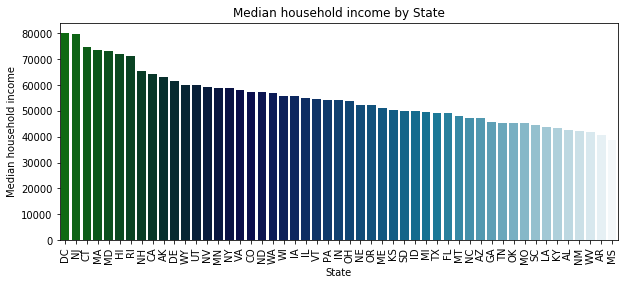

In [638]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfI.groupby(['State_Abbreviation'])['Median_household_income_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Median_household_income_raw_value'], x = cnt.index, palette= 'ocean')
ax.set_title('Median household income by State')
ax.set_ylabel('Median household income')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')

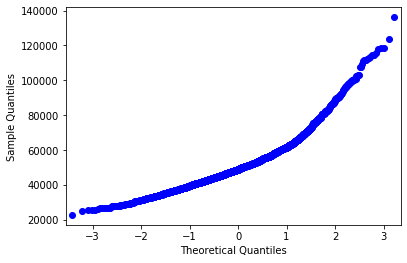

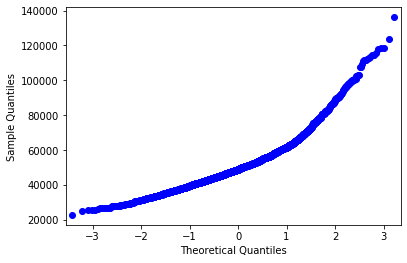

In [677]:
sm.qqplot(dfI['Median_household_income_raw_value'])

# <b>Employment status:

In [698]:
dfNew=df[['State_Abbreviation','Name','Unemployment_raw_value']]

In [699]:
dfNew.head()

,State_Abbreviation,Name,Unemployment_raw_value
3,AL,Autauga County,0.0386352233
4,AL,Baldwin County,0.0398833641
5,AL,Barbour County,0.0590092278
6,AL,Bibb County,0.043851399
7,AL,Blount County,0.0402139299


In [701]:
dfNew['Unemployment_raw_value']=dfNew['Unemployment_raw_value'].astype(float)

C:\Users\Isabel .LAPTOP-RN1IGMF0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'State')

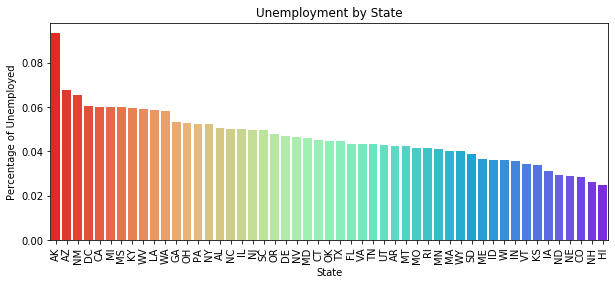

In [703]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfNew.groupby(['State_Abbreviation'])['Unemployment_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Unemployment_raw_value'], x = cnt.index, palette= 'rainbow_r')
ax.set_title('Unemployment by State')
ax.set_ylabel('Percentage of Unemployed')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')

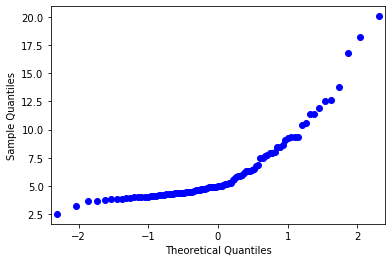

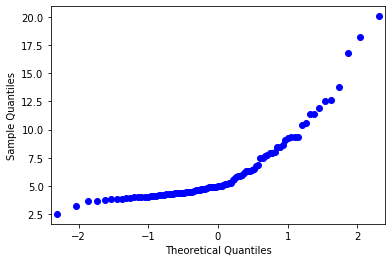

In [706]:
sm.qqplot(combine['% Unemployed'])

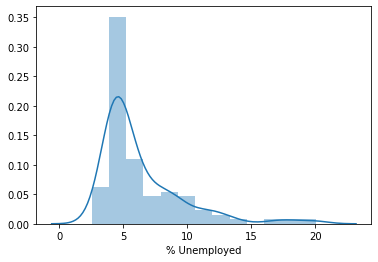

In [705]:
sns.distplot(combine['% Unemployed'])

In [707]:
df.head()

,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_(Black),Premature_death_(Hispanic),Premature_death_(White),Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Low_birthweight_(Black),Low_birthweight_(Hispanic),Low_birthweight_(White),Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Teen_births_(Black),Teen_births_(Hispanic),Teen_births_(White),Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Preventable_hospital_stays_(Black),Preventable_hospital_stays_(Hispanic),Preventable_hospital_stays_(White),Mammography_screening_raw_value,Mammography_screening_(Black),Mammography_screening_(Hispanic),Mammography_screening_(White),Flu_vaccinations_raw_value,Flu_vaccinations_(Black),Flu_vaccinations_(Hispanic),Flu_vaccinations_(White),High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Children_in_poverty_(Black),Children_in_poverty_(Hispanic),Children_in_poverty_(White),Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Air_pollution_-_particulate_matter_raw_value,Drinking_water_violations_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Driving_alone_to_work_(Black),Driving_alone_to_work_(Hispanic),Driving_alone_to_work_(White),Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Life_expectancy_(Black),Life_expectancy_(Hispanic),Life_expectancy_(White),Premature_age-adjusted_mortality_raw_value,Premature_age-adjusted_mortality_(Black),Premature_age-adjusted_mortality_(Hispanic),Premature_age-adjusted_mortality_(White),Child_mortality_raw_value,Child_mortality_(Black),Child_mortality_(Hispanic),Child_mortality_(White),Infant_mortality_raw_value,Infant_mortality_(Black),Infant_mortality_(Hispanic),Infant_mortality_(White),Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,HIV_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Disconnected_youth_raw_value,Median_household_income_raw_value,Median_household_income_(Black),Median_household_income_(Hispanic),Median_household_income_(White),Children_eligible_for_free_or_reduced_price_lunch_raw_value,Residential_segregation_-_Black/White_raw_value,Residential_segregation_-_non-white/white_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_Non-Hispanic_African_American_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_Hispanic_raw_value,%_Non-Hispanic_white_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value,Communicable_disease_raw_value,Self-inflicted_injury_hospitalizations_raw_value,Cancer_incidence_raw